In [1]:
import pandas as pd
import numpy as np


In [2]:
"""
Question 1
Load in the dataset
"""

survey = pd.read_csv("/Users/AnhHuynh/Documents/FALL 2023/INTERMEDIATE PYTHON/MINI PROJECTS/file.csv")
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   object 
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 751.2+ KB


In [40]:
"""
Question 2
How many samples were collected on each date
""" 
sample_count = survey.groupby('collection_date').nunique()['response_id']
sample_count

collection_date
5-24-2017    1479
5-25-2017     998
5-26-2017     598
5-27-2017     665
5-28-2017     761
5-29-2017     620
5-30-2017     582
5-31-2017     557
6-1-2017      607
Name: response_id, dtype: int64

In [5]:
survey.age.unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [6]:
survey['age'].replace({'24ko':24},inplace=True)
survey['age']=survey.age.astype(int)

In [7]:
"""
Question 3
What proportion of total respondents were aged less than 45?
"""
res = survey[survey.age < 45]['response_id'].count()
prop = round(100*res/len(survey.response_id),2)
prop

93.18

* 93.18% of respondents in this survey are aged less than 45. 

In [8]:
"""
Question 4
Create a new column named 'age_group'. 
The age groups are: 18-25,25-40,40-55,55+
"""

"\nCreate a new column named 'age_group'. \nThe age groups are: 18-25,25-40,40-55,55+\n"

In [9]:
bins = pd.cut(survey['age'], bins=[18,25,40,55,60], labels = ['18-25','25-40','40-55', '55+'],right=False)
survey['age_group'] = bins
survey.groupby('age_group').count()
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,25-40
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,25-40
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,18-25
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,18-25


In [10]:
"""
Question 5
How many samples are collected for each age group? Which age group has the most samples?
"""
survey.groupby('age_group')['response_id'].count()

age_group
18-25    2094
25-40    3844
40-55     801
55+        53
Name: response_id, dtype: int64

* 25-40 age group has the most samples.

In [11]:
"""
Question 6
What the proportion of the respondents had opted for RJD party in both the Vote_Now and the Past_Vote questions?
"""
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


In [12]:
rjd_n = survey[survey["Vote_Now"]=="RJD"]
rjd_p = survey[survey["Past_Vote"]=="RJD"]

In [13]:
merged_rjd = rjd_n.merge(rjd_p)
merged_rjd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 810
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   response_id       811 non-null    int64   
 1   collection_date   811 non-null    object  
 2   urban_rural       811 non-null    object  
 3   education         811 non-null    object  
 4   income            811 non-null    object  
 5   Vote_Now          811 non-null    object  
 6   Past_Vote         811 non-null    object  
 7   CM_satisfaction   811 non-null    object  
 8   MLA_satisfaction  811 non-null    object  
 9   age               811 non-null    int64   
 10  gender            811 non-null    object  
 11  assembly_no       811 non-null    int64   
 12  category          811 non-null    object  
 13  weight            811 non-null    float64 
 14  age_group         805 non-null    category
dtypes: category(1), float64(1), int64(3), object(10)
memory usage: 96.0+ KB


In [14]:
rjd_proportion = round(100*811/6867,2)
print(rjd_proportion)

11.81


* There is 11.81% of respondents who voted opted for RJD in the current vote and the past vote.

In [19]:
"""
Question 7
For each day of sample collection, determine the proportion of customers who are fully satisfied with the CM service. 
If there are 1000 samples collected on day, and 300 respondents are fully satisfied, the proportion is 0.3
"""
CM_satisfied = survey[survey["CM_satisfaction"] == "Fully Satisfied"]
CM_satisfied

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,18-25
14,15,5-24-2017,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,Male,199,Gen,0.226477,18-25
17,18,5-24-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,Male,200,Gen,0.181242,25-40
28,29,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,40-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,6852,6-1-2017,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,66,Male,165,Gen,0.300990,NaN
6852,6853,6-1-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",Undecided,BJP,Fully Satisfied,Fully Satisfied,28,Male,149,SC,0.983441,25-40
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,25-40
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,18-25


In [26]:
cm_satisfied_count = CM_satisfied.groupby('collection_date')['response_id'].nunique()

In [28]:
cm_satisfied_proportion = cm_satisfied_count/sample_count
cm_satisfied_proportion

collection_date
5-24-2017    0.098715
5-25-2017    0.095190
5-26-2017    0.098662
5-27-2017    0.081203
5-28-2017    0.120894
5-29-2017    0.117742
5-30-2017    0.111684
5-31-2017    0.111311
6-1-2017     0.123558
Name: response_id, dtype: float64

In [29]:
"""
Question 8: In a similar fashion, created a day-wise proportion of customers who are fully dissatisfied with 
MLA service.
Create a line plot of the result with time on the x-axis and proportion on the y-axis
"""
MLA_dissatisfied = survey[survey["MLA_satisfaction"] == "Fully Dissatisfied"]
MLA_dissatisfied

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
5,6,5-24-2017,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603,25-40
6,7,5-24-2017,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283,25-40
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,6856,6-1-2017,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",NOTA,JD(U),Fully Dissatisfied,Fully Dissatisfied,30,Male,241,EBC,0.174156,25-40
6857,6858,6-1-2017,Rural,12th Pass,"BPL/Below ₹ 5,000",RJJP,BJP,Fully Dissatisfied,Fully Dissatisfied,22,Male,168,Gen,0.085758,18-25
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,25-40
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,25-40


In [32]:
mla_dissatisfied_count = MLA_dissatisfied.groupby('collection_date')['response_id'].nunique()
mla_dissatisfied_proportion = mla_dissatisfied_count/sample_count
mla_dissatisfied_proportion

collection_date
5-24-2017    0.599730
5-25-2017    0.631263
5-26-2017    0.590301
5-27-2017    0.606015
5-28-2017    0.607096
5-29-2017    0.564516
5-30-2017    0.620275
5-31-2017    0.576302
6-1-2017     0.634267
Name: response_id, dtype: float64

<AxesSubplot:xlabel='collection_date'>

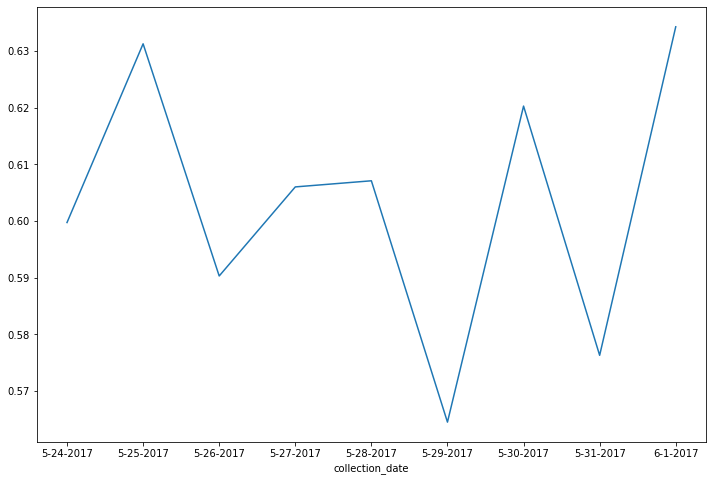

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
mla_dissatisfied_proportion.plot()

In [51]:
"""
Question 9
Create a pivot table (or crosstab) with index as Past Vote, column as Vote Now,
and cell values as the count of samples
"""
survey.pivot_table(aggfunc= 'count',
                  index = 'Past_Vote',
                  columns = 'Vote_Now')

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1630.0  3.0  5.0  42.0  101.0  110.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  22.0   41.0   69.0   
HAM                      2.0   NaN    25.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  57.0   10.0    9.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   254.0  2.0  2.0  45.0   72.0  279.0   
LJP                      NaN   NaN    76.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    45.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    46.0  NaN  1.0  31.0   31.0   39.0   
RLSP                     NaN   NaN    17.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                               ... weight                                   \
Vote_Now       LJP Left Front  ...    LJP Left Front   NOTA Others Plurals   
Past_Vote                      ...                                           
BJP           44.0       13.0  ...   44.0       13.0  194.0   32.0    87.0   
BSP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   
Did not vote  10.0       16.0  ...   10.0       16.0   83.0   11.0    51.0   
HAM            2.0        NaN  ...    2.0        NaN    4.0    NaN     NaN   
INC            NaN        3.0  ...    NaN        3.0    6.0    3.0     3.0   
JAP(L)         NaN        NaN  ...    NaN        NaN    NaN    1.0     NaN   
JD(U)         29.0        9.0  ...   29.0        9.0   90.0   18.0    43.0   
LJP            9.0        2.0  ...    9.0        2.0    3.0    NaN     2.0   
Left Front     NaN       18.0  ...    NaN       18.0    1.0    1.0     NaN   
NOTA           3.0        5.0  ...    3.0        5.0   46.0    7.0    11.0   
Others         1.0        4.0  ...    1.0        4.0   10.0    6.0     8.0   
RJD            4.0        9.0  ...    4.0        9.0   18.0    8.0    10.0   
RLSP           NaN        NaN  ...    NaN        NaN    3.0    NaN     2.0   
VIP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   

                                                 
Vote_Now        RJD  RJJP  RLSP Undecided   VIP  
Past_Vote                                        
BJP           370.0  88.0  24.0      62.0  10.0  
BSP             NaN   NaN   NaN       NaN   NaN  
Did not vote  195.0  20.0   3.0      31.0   5.0  
HAM             6.0   4.0   NaN       1.0   NaN  
INC           100.0   1.0   2.0       7.0   NaN  
JAP(L)          2.0   NaN   NaN       NaN   NaN  
JD(U)         435.0  13.0  25.0      36.0   6.0  
LJP            17.0   1.0   NaN       1.0   NaN  
Left Front      4.0   NaN   1.0       NaN   1.0  
NOTA           27.0   5.0   4.0       5.0   NaN  
Others         21.0   7.0   1.0       6.0   NaN  
RJD           811.0   1.0  10.0      14.0   4.0  
RLSP            8.0   2.0  12.0       1.0   1.0  
VIP             NaN   NaN   NaN       NaN   1.0  

[14 rows x 234 columns]

In [47]:
"""
Question 10
Repeat the above questions with the sum of weights as values
"""
value = survey['weight'].sum()
value

6838.158600412

In [52]:
survey.pivot_table(values='weight',
                   aggfunc='sum',
                  index = 'Past_Vote',
                  columns = 'Vote_Now')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806262,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


In [82]:
"""
Question 11
Create a DF by performing group-by on the age group column and count the values under each age group
"""
ser1 = survey.groupby('age_group')['response_id'].count()
df1 = ser1.reset_index()
df1

,age_group,response_id
0,18-25,2094
1,25-40,3844
2,40-55,801
3,55+,53


In [83]:
"""
Question 12
Create a DF by performing group-by over age-group
and finding the counts of total sample for each age group who opt for 'JD(U) party in Vote Now'
"""
ser2 = survey.groupby(['age_group','Vote_Now']).size().unstack()['JD(U)']
df2 = ser2.reset_index()

In [85]:
"""
Question 13
Join/Merge two dataframes from question 11 and 12 with the common column age_group
"""
merged_df = df1.merge(df2)
merged_df

,age_group,response_id,JD(U)
0,18-25,2094,181
1,25-40,3844,264
2,40-55,801,68
3,55+,53,5
